# TASK 5

<i> Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.


##### Dataset : <i>https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/code

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
df=pd.read_csv("US_Accidents_March23.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [5]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

In [6]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

<Axes: >

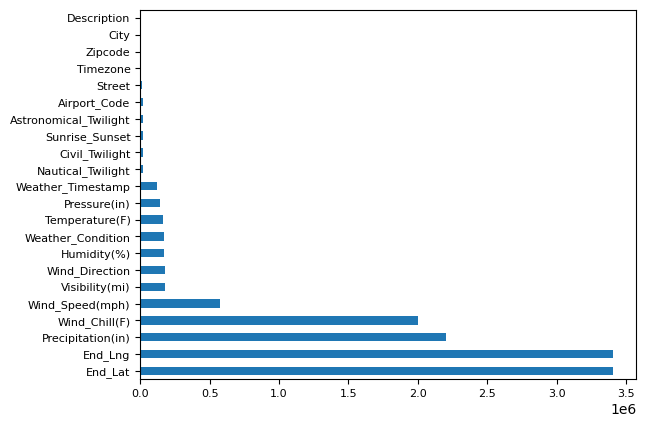

In [7]:
b = df.isnull().sum().sort_values(ascending=False)
b[b!=0].plot(kind= 'barh',fontsize='8')

In [8]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)','Description'],axis=1,inplace=True)

In [9]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Temperature(F)           163853
Humidity(%)              174144
Pressure(in)             140679
Visibility(mi)           177098
Wind_Direction           175206
Wind_Speed(mph)          571233
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabo

### Top 10 Cities by Accident Count

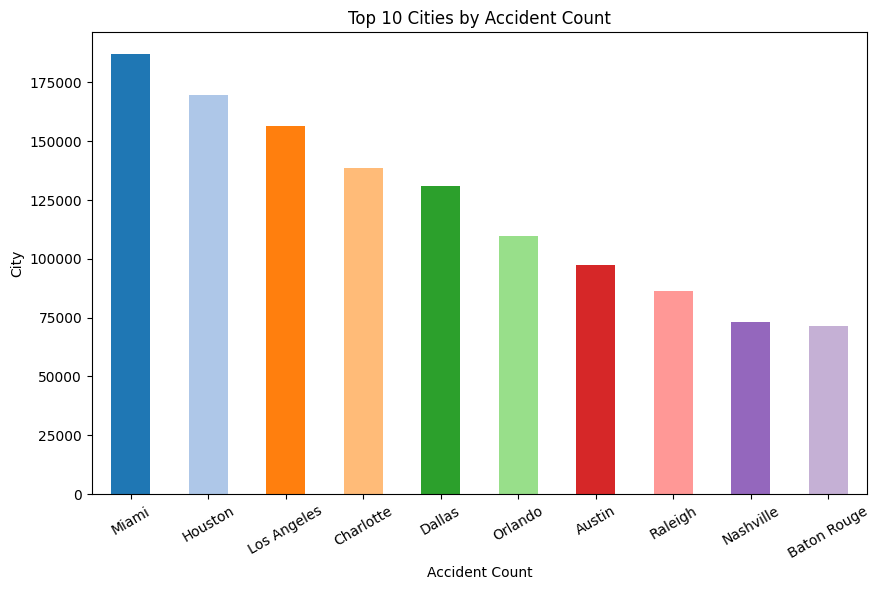

In [10]:
top_10_cities = df.City.value_counts().nlargest(10)
top_10_cities.plot(kind='bar', figsize=(10, 6), color=plt.cm.tab20(range(20)))
plt.title('Top 10 Cities by Accident Count')
plt.xticks(rotation = 30)
plt.xlabel('Accident Count')
plt.ylabel('City')
plt.show()

### Distribution of Acciendents as high and low

In [11]:
city_accidents=df.City.value_counts()
low_accident_cities = city_accidents[city_accidents< 1000]  # having less than 1000 accidents
high_accident_cities=city_accidents[city_accidents>= 1000]


[Text(0, 0.5, 'Accidents'), Text(0.5, 0, 'City')]

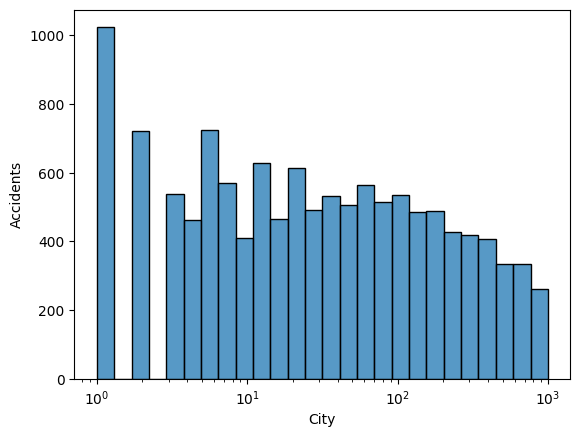

In [12]:
# Distribution of low accident cities
p = sns.histplot(low_accident_cities, log_scale=True, kde=False)
p.set(ylabel = 'Accidents',xlabel='City')

<Axes: xlabel='count', ylabel='Count'>

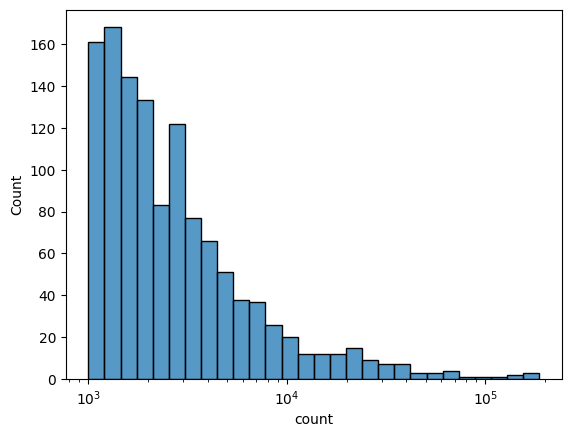

In [13]:
# Distribution of high accident cities
sns.histplot(high_accident_cities, log_scale=True, kde=False)

#### There are also cities which have reported just 1 accident in 4 years.
#### This could be an indication of some missing data/ irregularities or the impact of population, per-capitaincome, government spending, average age of city, etc.

In [14]:
city_accidents[city_accidents == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

### Plotting the latitudes and longitudes

C:\Users\arkam\AppData\Local\Temp\ipykernel_228\668475141.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

C:\Users\arkam\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\arkam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


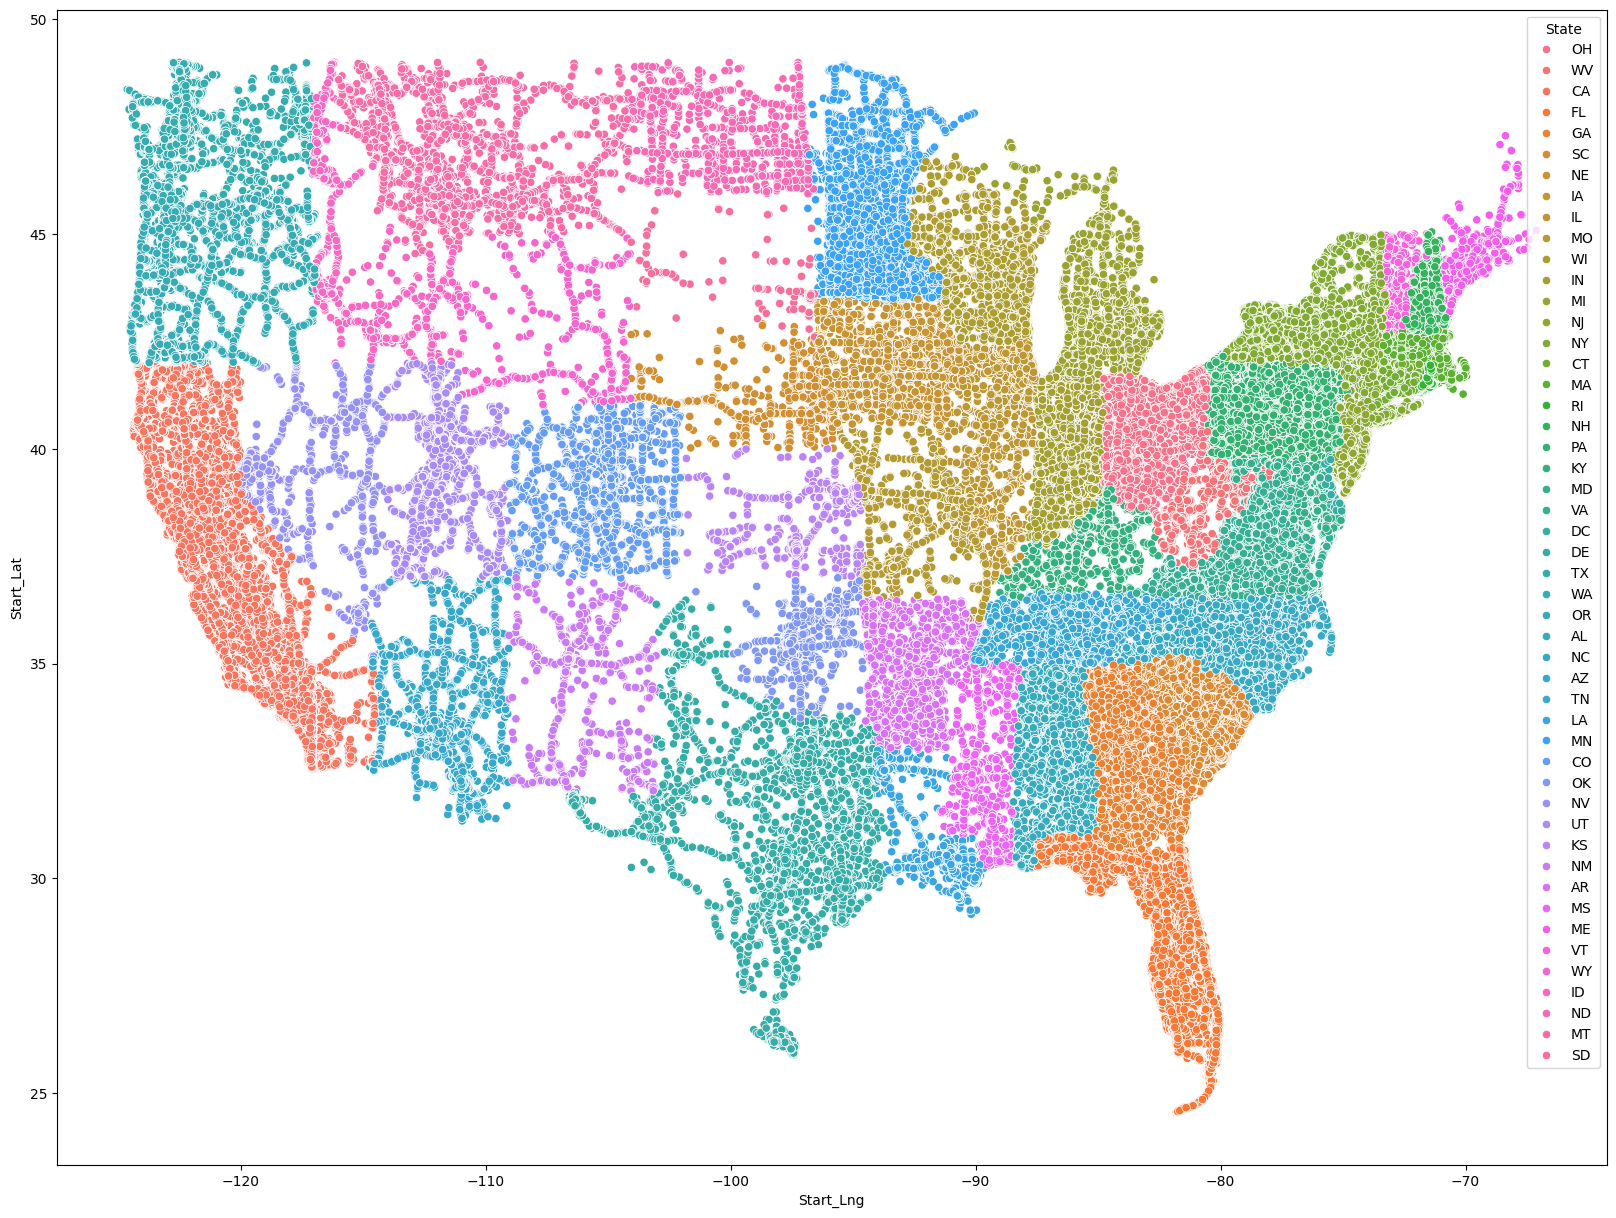

In [15]:
plt.figure(figsize=(20,15))
plt.legend(loc="upper right")
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State, data=df)

### Plotting in accordance with the severity of accident

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

C:\Users\arkam\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\arkam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


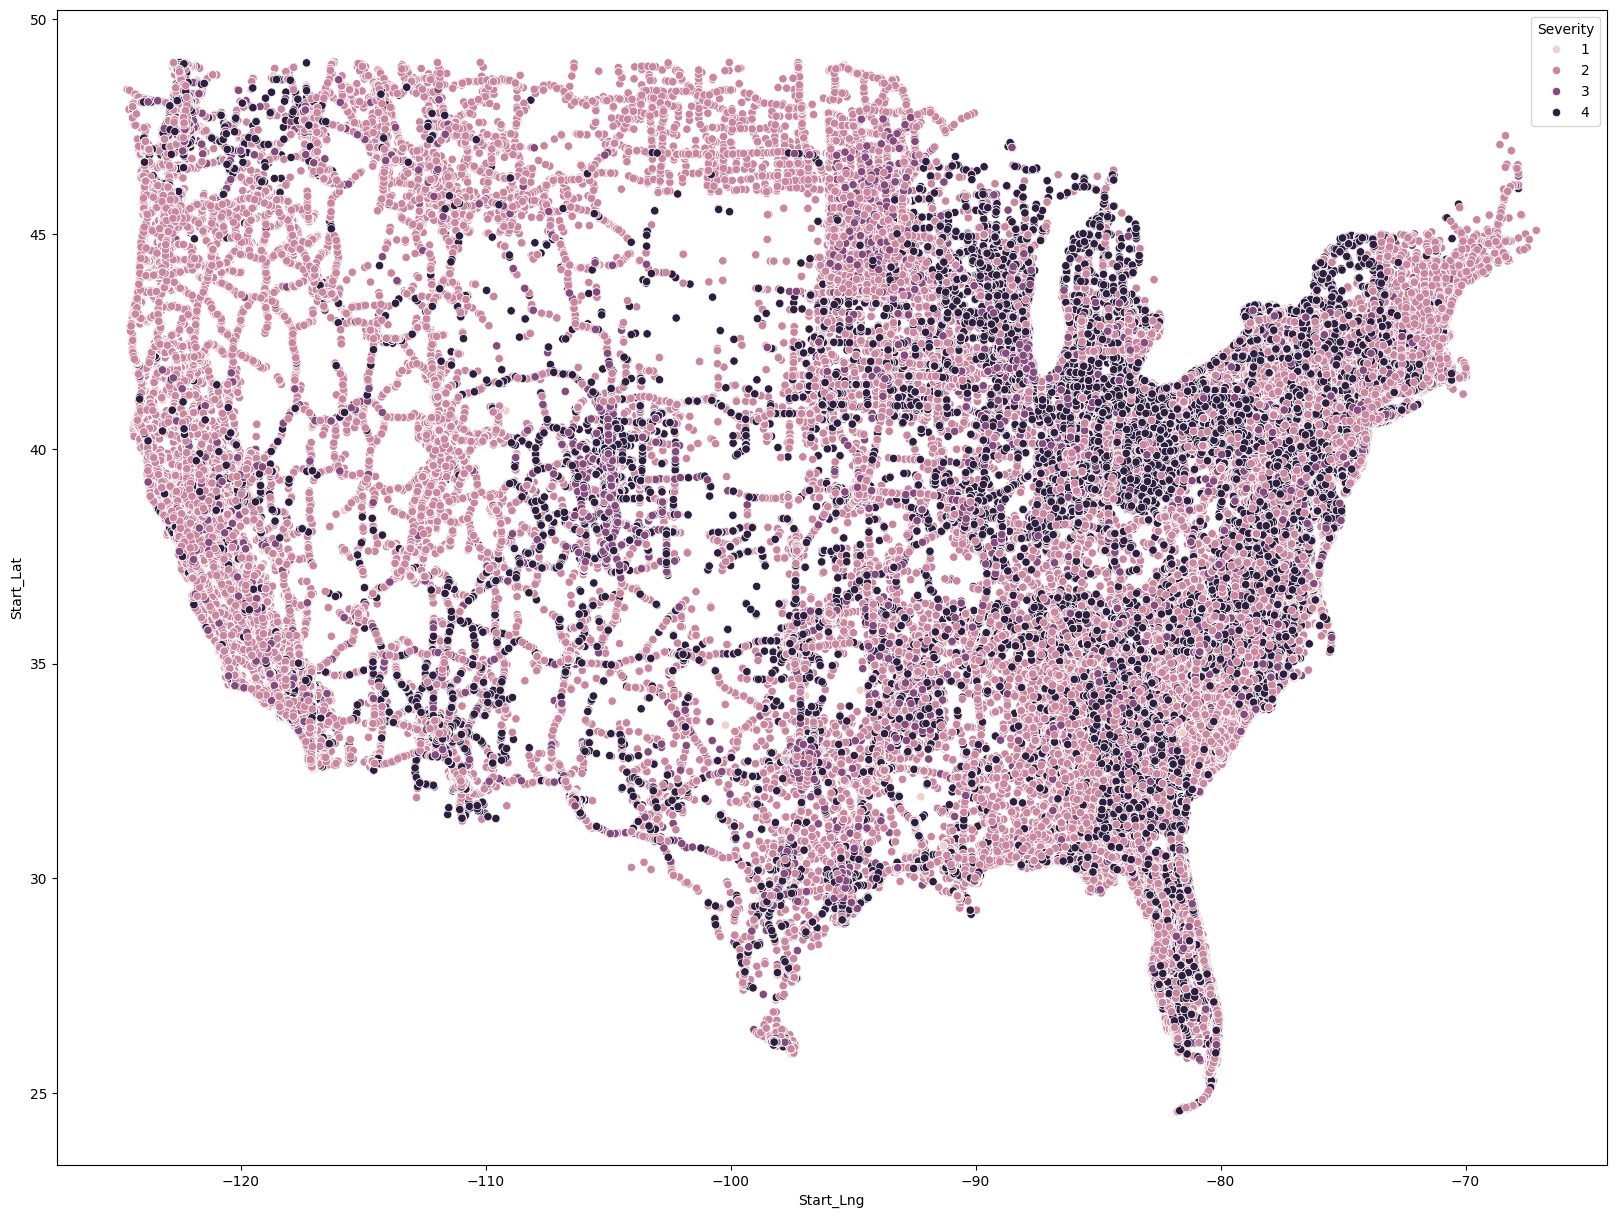

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity, data=df)

### Weather conditions during accidents

C:\Users\arkam\AppData\Local\Temp\ipykernel_228\1516015323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Weather_Condition', data=weather[:10], palette='bright')


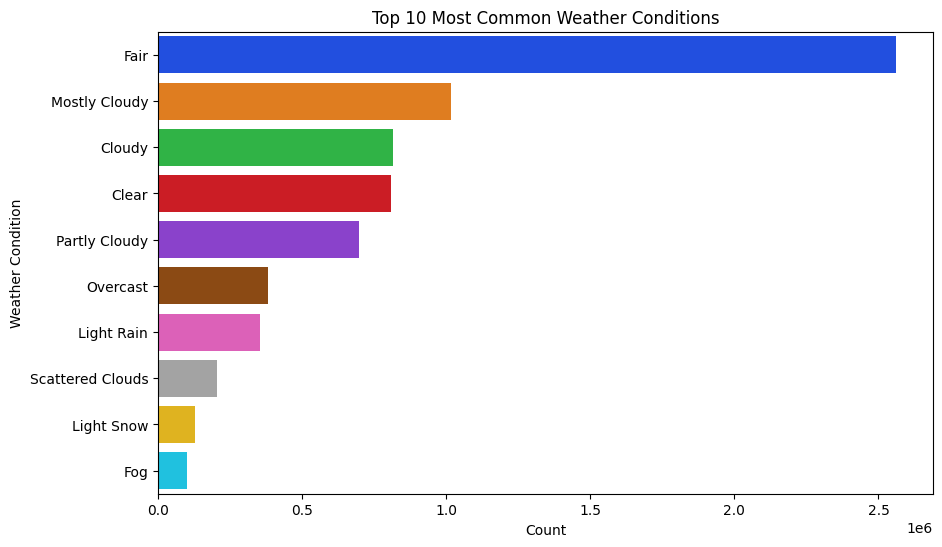

In [17]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()

# Rename the columns for better readability
weather.columns = ['Weather_Condition', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Weather_Condition', data=weather[:10], palette='bright')
plt.title('Top 10 Most Common Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

### Segregating accidents on the basis of severity

In [18]:
severe_accidents_4 = df[df.Severity==4].State.value_counts()
severe_accidents_3 = df[df.Severity==3].State.value_counts()
severe_accidents_2 = df[df.Severity==2].State.value_counts()
severe_accidents_1 = df[df.Severity==1].State.value_counts()

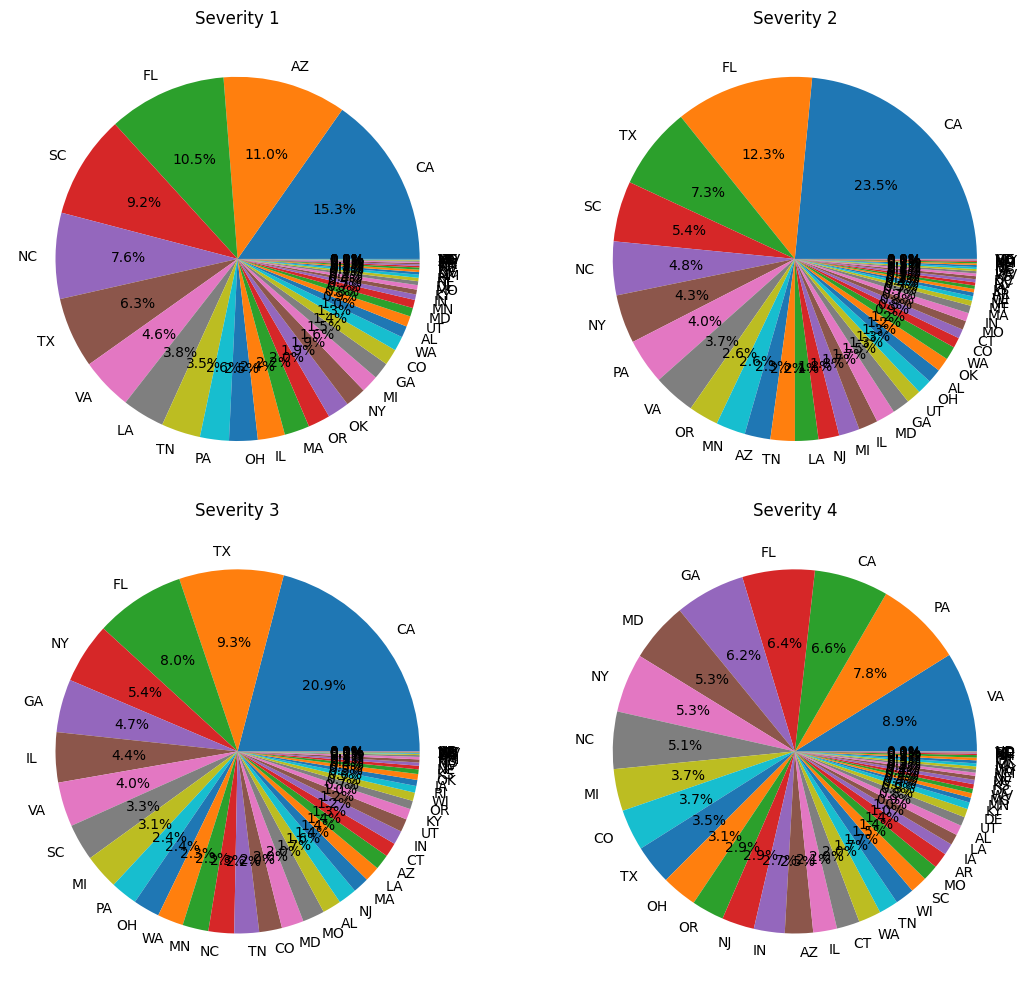

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each severity level as a pie chart
axs[0, 0].pie(severe_accidents_1, labels=severe_accidents_1.index, autopct='%1.1f%%')
axs[0, 0].set_title('Severity 1')

axs[0, 1].pie(severe_accidents_2, labels=severe_accidents_2.index, autopct='%1.1f%%')
axs[0, 1].set_title('Severity 2')

axs[1, 0].pie(severe_accidents_3, labels=severe_accidents_3.index, autopct='%1.1f%%')
axs[1, 0].set_title('Severity 3')

axs[1, 1].pie(severe_accidents_4, labels=severe_accidents_4.index, autopct='%1.1f%%')
axs[1, 1].set_title('Severity 4')

# Layout and show the plot
plt.tight_layout()
plt.show()

#### California generally seems to have the most accidents (in all categories)

### Factors affecting accidents

In [20]:
crossing = df.Crossing.groupby(df.Severity).value_counts()
bump = df.Bump.groupby(df.Severity).value_counts()
give_way = df.Give_Way.groupby(df.Severity).value_counts()
traffic_signal = df.Traffic_Signal.groupby(df.Severity).value_counts()
stop = df.Stop.groupby(df.Severity).value_counts()
traffic_calming = df.Traffic_Calming.groupby(df.Severity).value_counts()
railway = df.Railway.groupby(df.Severity).value_counts()
no_exit = df.No_Exit.groupby(df.Severity).value_counts()
amenity = df.Amenity.groupby(df.Severity).value_counts()

<Axes: title={'center': 'Railway'}, xlabel='Severity'>

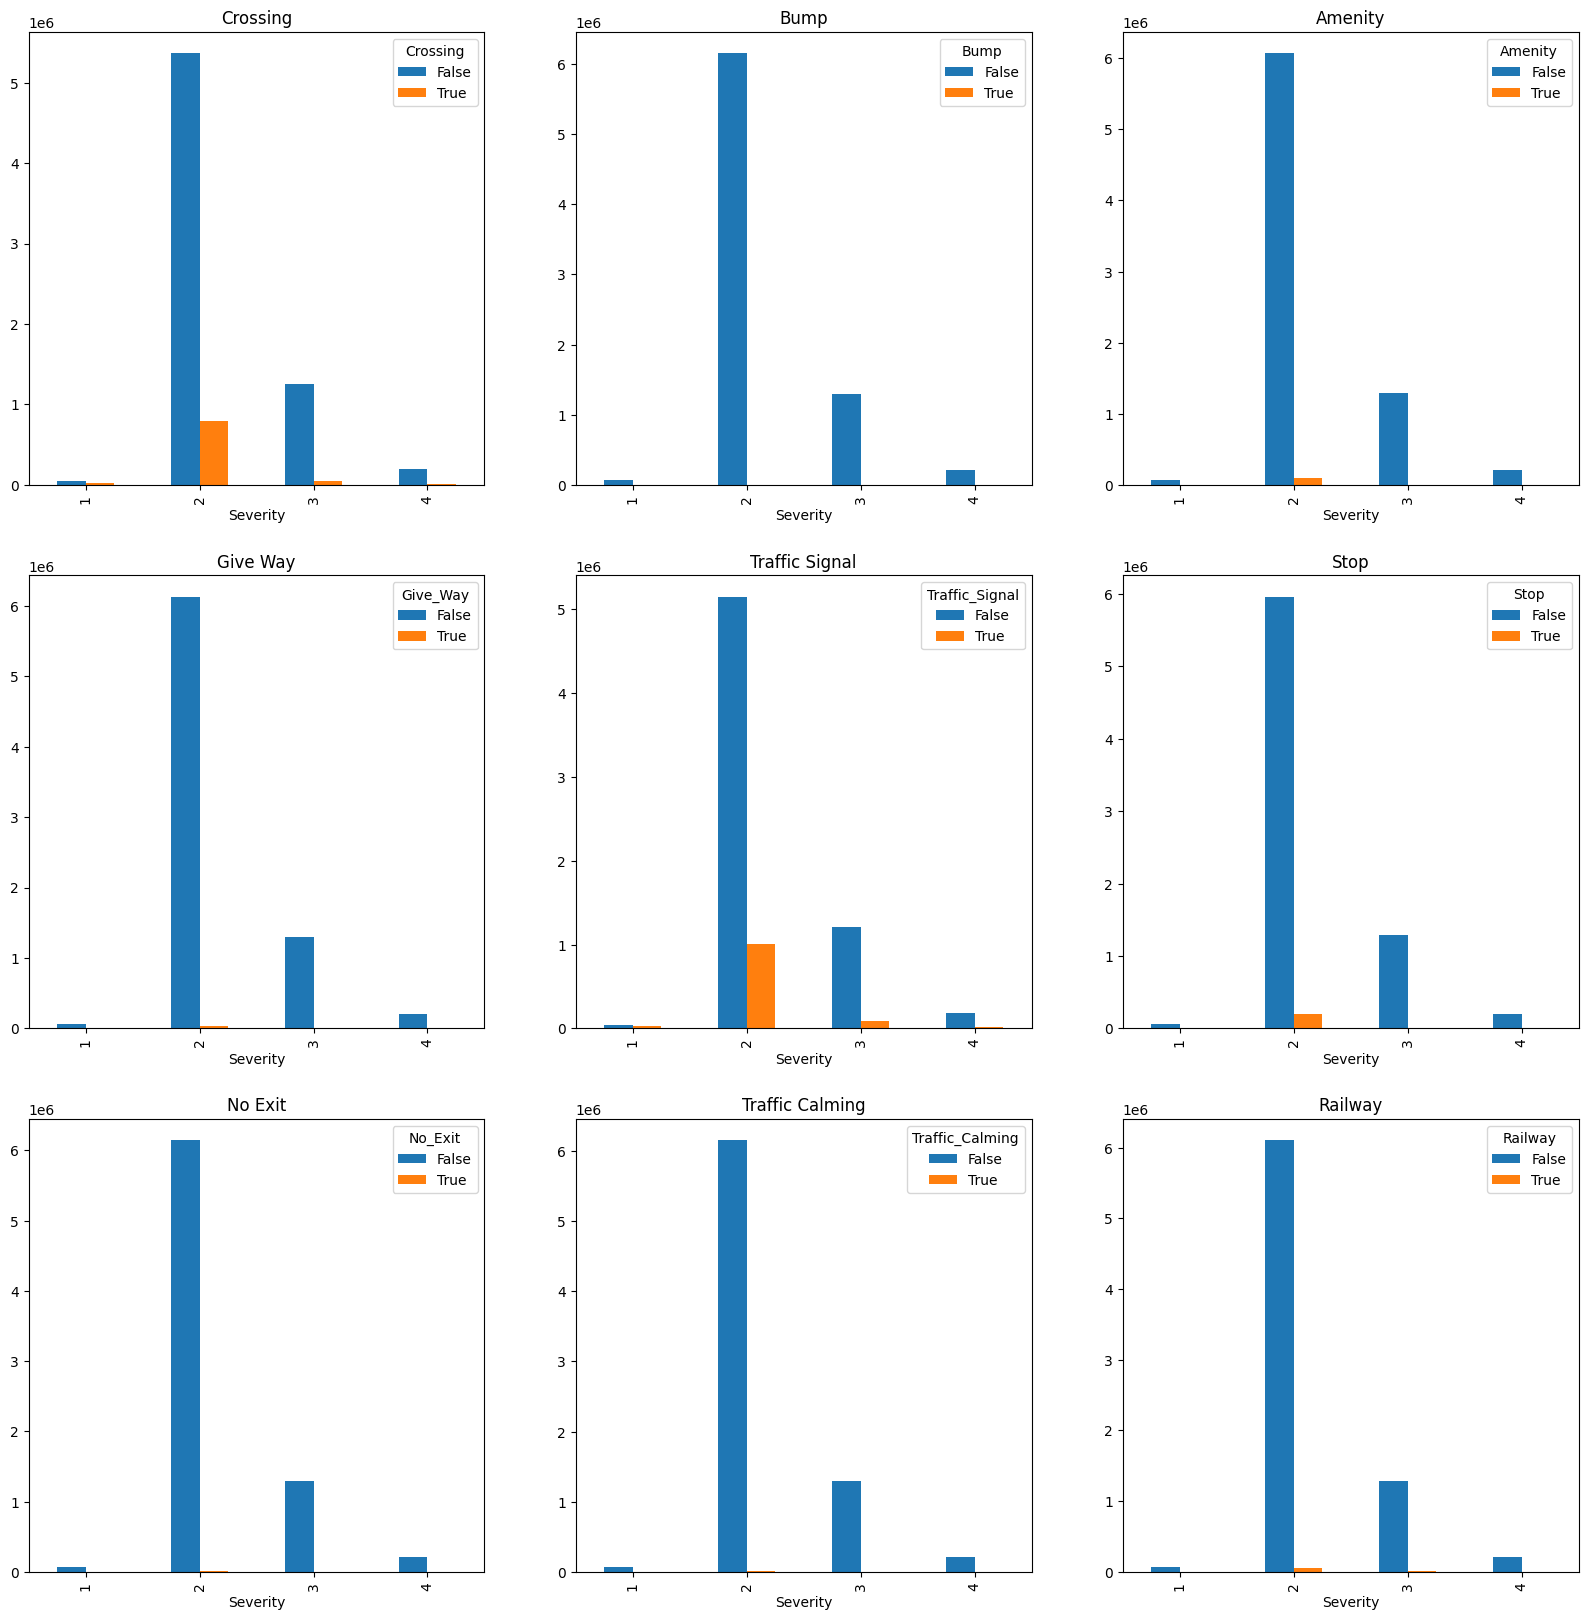

In [21]:
fig, ax = plt.subplots(3,3, figsize=(20, 20))

crossing.unstack().plot(kind='bar', ax=ax[0,0], title="Crossing")
bump.unstack().plot(kind='bar', ax=ax[0,1], title="Bump")
amenity.unstack().plot(kind='bar', ax=ax[0,2], title="Amenity")
give_way.unstack().plot(kind='bar', ax=ax[1,0], title="Give Way")
traffic_signal.unstack().plot(kind='bar', ax=ax[1,1], title="Traffic Signal")
stop.unstack().plot(kind='bar', ax=ax[1,2], title="Stop")
no_exit.unstack().plot(kind='bar', ax=ax[2,0], title="No Exit")
traffic_calming.unstack().plot(kind='bar', ax=ax[2,1], title="Traffic Calming")
railway.unstack().plot(kind='bar', ax=ax[2,2], title="Railway")